In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
train_X=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/preprocessed_X_train.csv')
train_y=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/y_train.csv')
test_X=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/preprocessed_X_test.csv')
test_y=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/y_test.csv')

In [12]:
train_X.head(5)

,school,sex,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,...,higher,internet,freetime,Dalc,Walc,health,absences,G1,G2,total
0,0,0,19,1,2,2,3,1,1,2,...,1,1,3,1,1,5,0,10,10,20
1,0,0,16,1,4,4,4,3,1,2,...,1,1,5,1,2,3,0,11,10,21
2,1,0,18,1,2,4,2,3,1,2,...,1,1,3,1,3,1,8,8,5,13
3,0,0,20,0,2,1,2,0,2,2,...,0,1,2,1,2,2,8,10,12,22
4,1,1,19,1,2,1,0,0,2,1,...,0,1,4,1,3,5,4,8,9,17


In [3]:
# 3. GridSearchCV를 사용한 하이퍼파라미터 튜닝

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [4]:
# 3 랜덤포레스트 트리 회귀 모델 학습

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)


In [5]:
grid_search.fit(train_X, train_y)

/home/iai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/iai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/iai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/iai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [6]:
# 최적의 하이퍼파라미터를 사용한 모델

best_rf = grid_search.best_estimator_

In [7]:
# 4. 모델 학습

best_rf.fit(train_X, train_y)

/home/iai/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)

In [8]:
# 모델 평가 (RMSE)

predictions=best_rf.predict(test_X)
rmse=np.sqrt(mean_squared_error(test_y,predictions))

In [9]:
rmse

0.9522044434766762

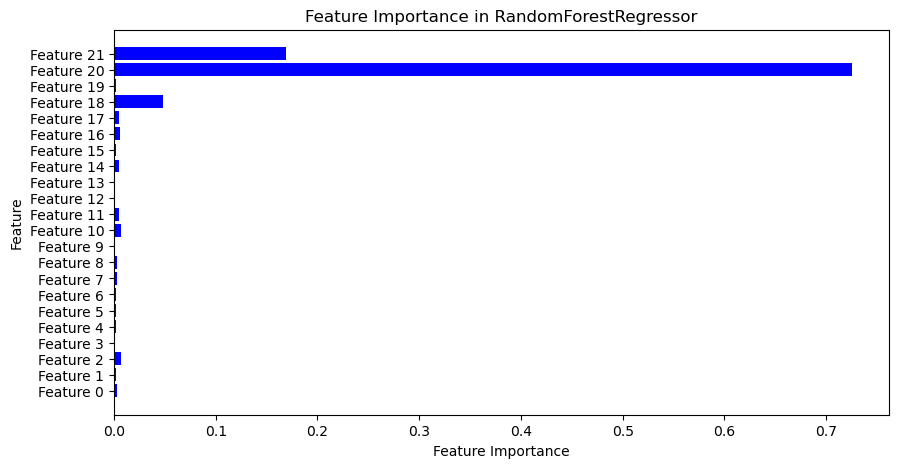

In [11]:
# 6. 변수 중요도 계산 및 시각화
feature_importances = best_rf.feature_importances_
feature_names = [f'Feature {i}' for i in range(train_X.shape[1])]

# 변수 중요도 시각화
plt.figure(figsize=(10, 5))
plt.barh(feature_names, feature_importances, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in RandomForestRegressor')
plt.show()

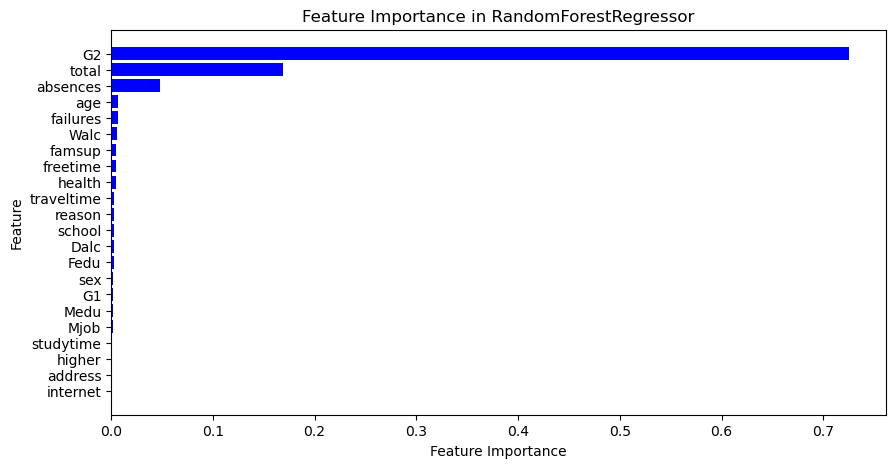

In [16]:
# 6. 변수 중요도 계산 및 시각화
feature_importances = best_rf.feature_importances_
feature_names = train_X.columns  # train_X의 컬럼 이름 사용

# 변수 중요도를 내림차순으로 정렬
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# 변수 중요도 시각화
plt.figure(figsize=(10, 5))
plt.barh(sorted_feature_names, sorted_feature_importances, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in RandomForestRegressor')
plt.gca().invert_yaxis()  # 가장 중요한 특성이 위로 오도록 역순으로 축 정렬
plt.show()